In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import glob
sns.set_style('whitegrid')

import scipy.signal as sigctrl_preproc
import scipy as sp
import os
from preproc_6ax_data import proc_parse_salto_clips_custom, resample_df_clips, load_and_preproc_data_single

#DATA_DIR = '/home/asya/Desktop/Gyro_Data/modeling/'
DATA_DIR = '../Gyro_Data/modeling/'

In [3]:
!pip install -q tensorflow==2.3.0
import tensorflow as tf

You should consider upgrading via the '/home/asya/anaconda3/envs/tflite/bin/python -m pip install --upgrade pip' command.


In [4]:
## want to score a continuous signal, rather than mixed up clips

In [5]:
from preproc_6ax_data import proc_parse_silks_clips_custom, proc_parse_ctrl_clips_custom

In [6]:
from train import build_net, load_data, train_model, reshape_function, build_cnn
model, model_path = build_cnn(60)
model.load_weights(os.path.join(model_path,'weights.h5'))

model CNN
Built CNN.


In [71]:
print(model)

In [207]:
ls ../Gyro_Data/modeling/

ground_linear/      salto_drop_quadratic/  salto_pike_raw/
ground_quadratic/   salto_drop_raw/        silks_linear/
ground_raw/         salto_pike_linear/     silks_quadratic/
salto_drop_linear/  salto_pike_quadratic/  silks_raw/


In [129]:
def reshape_function(data, label):
  reshaped_data = tf.reshape(data, [-1, 6, 1])
  return reshaped_data, label

def pad_predictions(predictions, seq_length):
    return np.vstack((np.zeros((seq_length,4)),np.asarray(predictions)))

def load_and_predict_file(fle_name, seq_length):
    with open(fle_name, "r") as f:
        lines = f.readlines()[1:]
        data = []
        for line in enumerate(lines):  # pylint: disable=unused-variable
            convert_line = [float(a) for a in line[1].strip('\n').split(',')]
            data.append(convert_line)
    data_batch = []
    labels = []
    for i in range(len(data)-seq_length):
        data_batch.append(data[i:(seq_length+i)])
        labels.append(-1)
    batch_size = 64
    dataset = tf.data.Dataset.from_tensor_slices((data_batch, np.asarray(labels).astype("int32")))
    dataset = dataset.map(reshape_function).batch(batch_size)
    predictions = model.predict(dataset)
    return pad_predictions(predictions, seq_length)

In [217]:
fle_name = '../Gyro_Data/modeling/ground_linear/0.csv'
df = pd.read_csv(fle_name)
seq_length = 60
predictions = load_and_predict_file(fle_name, seq_length)

df = pd.concat((df, pd.DataFrame(predictions, columns = ['p0','p1','p2','p3'])), axis = 1)
df['p_select'] = np.argmax(predictions, axis=1)

df['p_color'] = df['p_select'].apply(lambda x: sns.color_palette("tab10", 10)[x if x<2 else 2*x])

df = df.loc[60:]
df.index = df.index/119

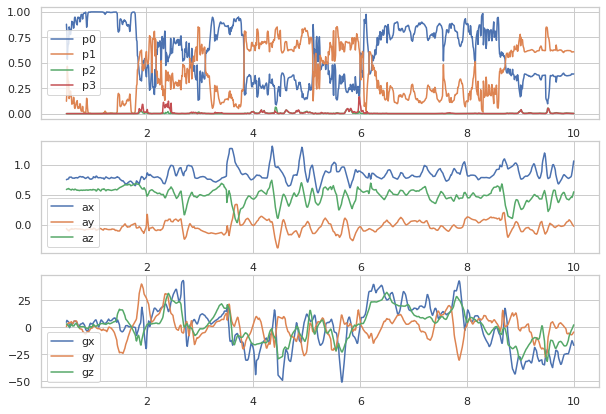

In [218]:
fig, ax = plt.subplots(3,1, figsize = (10,7))
df[['p0','p1','p2','p3']].plot(ax = ax[0])
df[['ax','ay','az']].plot(ax = ax[1])
df[['gx','gy','gz']].plot(ax = ax[2])

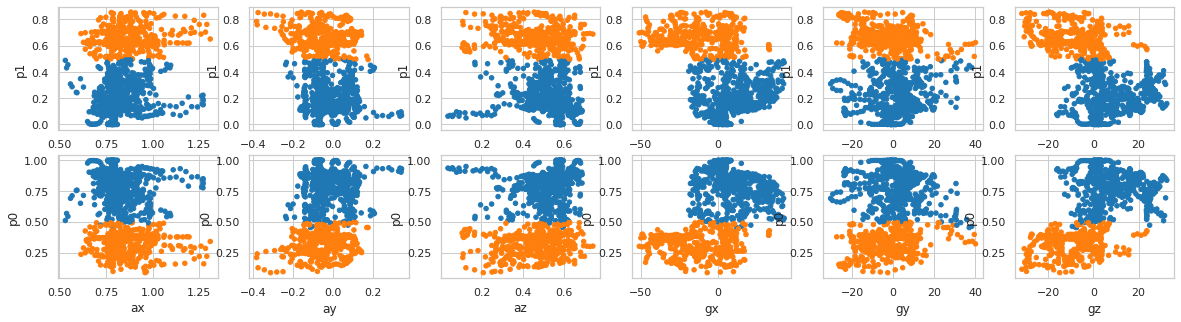

In [219]:
fig, ax = plt.subplots(2,6, figsize = (20,5))

df.plot.scatter(ax = ax[0,0], x = 'ax', y = 'p1', color = df.p_color)
df.plot.scatter(ax = ax[0,1], x = 'ay', y = 'p1', color = df.p_color)
df.plot.scatter(ax = ax[0,2], x = 'az', y = 'p1', color = df.p_color)
df.plot.scatter(ax = ax[0,3], x = 'gx', y = 'p1', color = df.p_color)
df.plot.scatter(ax = ax[0,4], x = 'gy', y = 'p1', color = df.p_color)
df.plot.scatter(ax = ax[0,5], x = 'gz', y = 'p1', color = df.p_color)

df.plot.scatter(ax = ax[1,0], x = 'ax', y = 'p0', color = df.p_color)
df.plot.scatter(ax = ax[1,1], x = 'ay', y = 'p0', color = df.p_color)
df.plot.scatter(ax = ax[1,2], x = 'az', y = 'p0', color = df.p_color)
df.plot.scatter(ax = ax[1,3], x = 'gx', y = 'p0', color = df.p_color)
df.plot.scatter(ax = ax[1,4], x = 'gy', y = 'p0', color = df.p_color)
df.plot.scatter(ax = ax[1,5], x = 'gz', y = 'p0', color = df.p_color)

In [194]:
predictions.shape

(1083, 4)

In [ ]:
test_data = 

In [ ]:
pred = np.argmax(model.predict(test_data), axis=1)

In [ ]:
def reshape_function(data, label):
  reshaped_data = tf.reshape(data, [-1, 6, 1])
  return reshaped_data, label

In [11]:
df

,ax,ay,az,gx,gy,gz
0,-0.949000,-0.038000,0.537000,-43.500000,-22.900000,43.000000
1,-0.944918,-0.017832,0.547564,-43.860144,-24.940816,44.056423
2,-0.940837,0.002336,0.558128,-44.220288,-26.981633,45.112845
3,-0.936755,0.022504,0.568693,-44.580432,-29.022449,46.169268
4,-0.932673,0.042672,0.579257,-44.940576,-31.063265,47.225690
...,...,...,...,...,...,...
1185,-0.430732,-0.930730,-0.289208,41.450280,-95.202241,38.419725
1186,-0.439835,-0.940767,-0.309983,41.310224,-94.081793,41.057446
1187,-0.448939,-0.950805,-0.330758,41.170168,-92.961345,43.695168
1188,-0.458043,-0.960842,-0.351533,41.030112,-91.840896,46.332890
